In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size
IMG_SIZE = (224, 224)  # You can adjust this depending on the image size

# Define paths
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/xray_dataset_covid19/test'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    shear_range=0.2,          # Apply random transformations
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize test data

# Loading the training and test datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # For binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


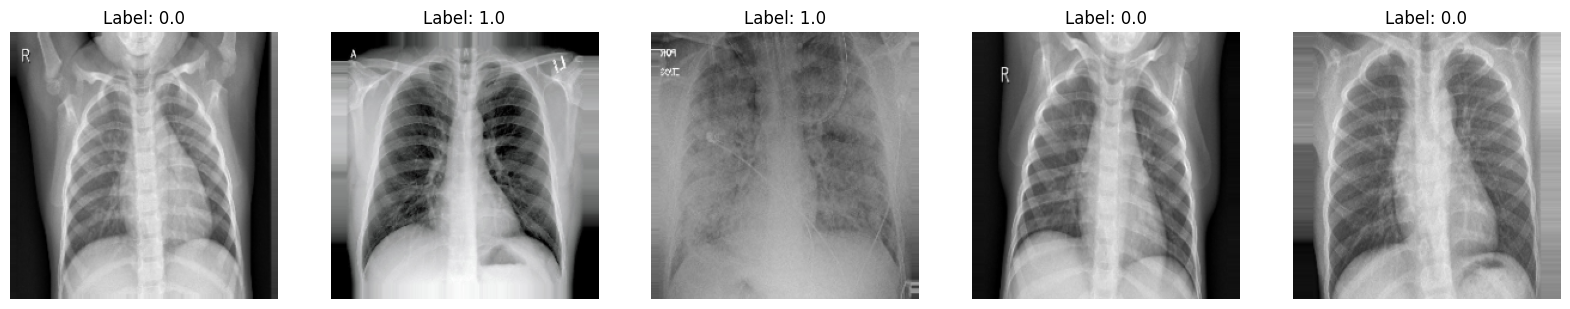

In [3]:
#this is for cheking data in the Generators
import matplotlib.pyplot as plt

# Get a batch of images and labels from the test generator
# For test_generator
# images, labels = next(test_generator)

# For train_generator
images, labels = next(train_generator)


# Plot the first few images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))  # Create a 1x5 subplot for displaying 5 images
for i in range(5):
    axes[i].imshow(images[i])  # Display the image
    axes[i].set_title(f'Label: {labels[i]}')  # Set the title as the label
    axes[i].axis('off')

plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Define the DNN model
model = Sequential()

# Add a Flatten layer to convert 3D image input to 1D
model.add(Flatten(input_shape=(224, 224, 3)))

# Input layer
model.add(Dense(128, activation='relu'))

# Hidden layers

model.add(Dense(128, activation='relu'))

# Output layer (Sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Show the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,284,353 (73.56 MB)

 Trainable params: 19,284,353 (73.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(test_generator.filenames)  # This should list the file paths in the test directory.
print(test_generator.samples)    # This should print the number of samples in the test set.
print(test_generator.class_indices)  # This should print the class mapping.


['NORMAL/NORMAL2-IM-0035-0001.jpeg', 'NORMAL/NORMAL2-IM-0052-0001.jpeg', 'NORMAL/NORMAL2-IM-0058-0001.jpeg', 'NORMAL/NORMAL2-IM-0059-0001.jpeg', 'NORMAL/NORMAL2-IM-0072-0001.jpeg', 'NORMAL/NORMAL2-IM-0073-0001.jpeg', 'NORMAL/NORMAL2-IM-0092-0001.jpeg', 'NORMAL/NORMAL2-IM-0105-0001.jpeg', 'NORMAL/NORMAL2-IM-0110-0001.jpeg', 'NORMAL/NORMAL2-IM-0111-0001.jpeg', 'NORMAL/NORMAL2-IM-0112-0001.jpeg', 'NORMAL/NORMAL2-IM-0117-0001.jpeg', 'NORMAL/NORMAL2-IM-0120-0001.jpeg', 'NORMAL/NORMAL2-IM-0123-0001.jpeg', 'NORMAL/NORMAL2-IM-0130-0001.jpeg', 'NORMAL/NORMAL2-IM-0131-0001.jpeg', 'NORMAL/NORMAL2-IM-0132-0001.jpeg', 'NORMAL/NORMAL2-IM-0139-0001.jpeg', 'NORMAL/NORMAL2-IM-0145-0001.jpeg', 'NORMAL/NORMAL2-IM-0171-0001.jpeg', 'PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg', 'PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg', 'PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg', 'PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg', 'PNEUMONIA/SARS-10.1

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])


# Train the model without explicitly setting validation_steps
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/148 ━━━━━━━━━━━━━━━━━━━━ 50s 356ms/step - accuracy: 0.6121 - loss: 18.7527

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.6017 - loss: 27.8893 - val_accuracy: 0.5000 - val_loss: 20.0748
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6398 - loss: 10.4578 - val_accuracy: 0.9250 - val_loss: 0.2973
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7029 - loss: 4.3311 - val_accuracy: 0.9750 - val_loss: 0.0718
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7431 - loss: 4.3232 - val_accuracy: 0.5250 - val_loss: 7.1469
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7088 - loss: 3.5562 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7699 - loss: 2.5609 - val_accuracy: 0.9250 - val_loss: 0.3127
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8162 - loss: 2.8855 - val_accuracy: 0.9250 - val_loss: 0.7498
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7970 - loss: 1.4306 - val_accu

In [ ]:
# Evaluate on the test dataset
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss*100:.4f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9292 - loss: 0.1368
Test Accuracy: 92.50%
Test Loss: 13.9287%


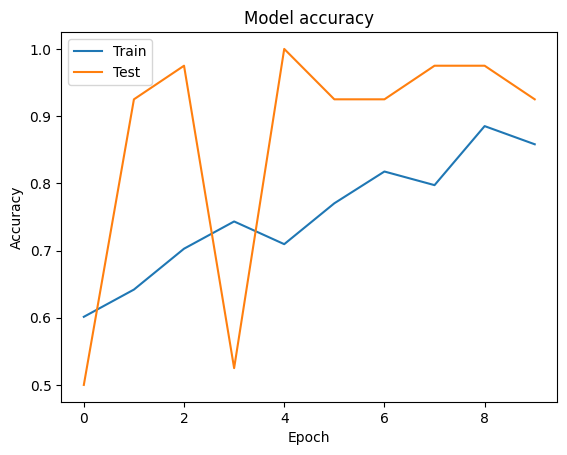

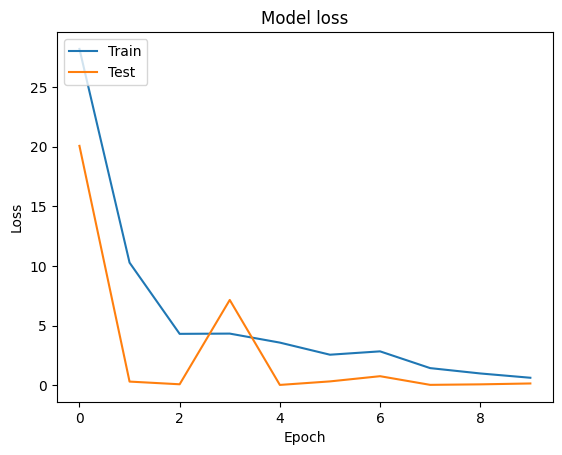

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
Accuracy: 0.50
Precision: 20.00
Recall: 23.00
F1 Score: 21.40


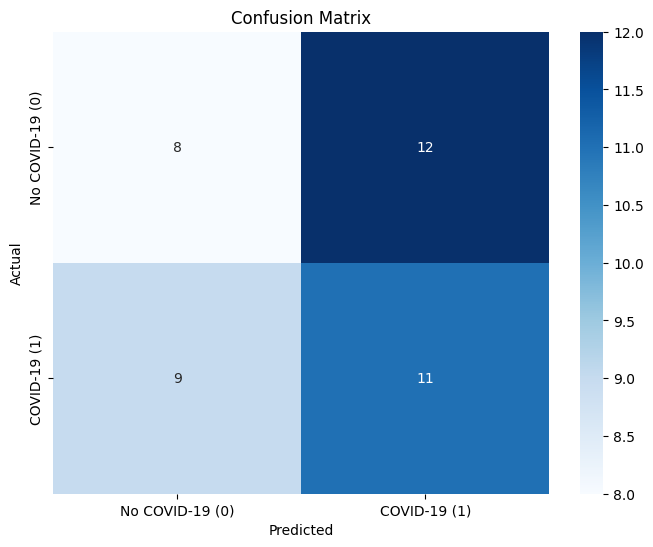

                 precision    recall  f1-score   support

No COVID-19 (0)       0.47      0.40      0.43        20
   COVID-19 (1)       0.48      0.55      0.51        20

       accuracy                           0.47        40
      macro avg       0.47      0.48      0.47        40
   weighted avg       0.47      0.47      0.47        40



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Get the true labels and predictions
true_labels = test_generator.classes  # Actual labels
predictions = model.predict(test_generator)  # Model predictions
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate evaluation metrics
accuracy = np.mean(predicted_labels == true_labels)
precision = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(predicted_labels == 1)  # TP / (TP + FP)
recall = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(true_labels == 1)  # TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)  # Harmonic mean of precision and recall

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No COVID-19 (0)', 'COVID-19 (1)'], yticklabels=['No COVID-19 (0)', 'COVID-19 (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
report = classification_report(true_labels, predicted_labels, target_names=['No COVID-19 (0)', 'COVID-19 (1)'])
print(report)


In [ ]:
# Save the model in HDF5 format
model.save('pneumonia_classification_modelDNN.h5')


In [ ]:
# Later, reload the model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/pneumonia_classification_modelDNN.h5')

# Evaluate the loaded model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss*100:.4f}%')
# Predict using the loaded model
predictions = model.predict(test_generator)

# print(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9729 - loss: 0.1278
Test Accuracy: 97.50%
Test Loss: 11.8012%


1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step
